In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam


In [2]:
def load_and_prepare_data(X_train, y_train, X_test, y_test, is_mnist=True):
  # Scale images to the [0, 1] range
  X_train = X_train.astype("float32") / 255
  X_test = X_test.astype("float32") / 255


  if is_mnist:
    # Make sure images have shape (28, 28, 1)
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)

  print("x_train shape:\n", X_train.shape)
  print(X_train.shape[0], "train samples")
  print(X_test.shape[0], "test samples")
  print()


  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, 10)
  y_test = keras.utils.to_categorical(y_test, 10)

  return X_train, y_train, X_test, y_test

In [3]:
def eval_with_hyperparams(model, network_name="lenet"):
  accuracies = {}

  epochs = [15, 20, 25, 30]
  batch_sizes = [128, 64, 64, 32]
  optim_tuples = [('Adam', 0.001), ('SGD', 0.001), ('Adam', 0.005), ('Adam', 0.01)]
  optimizers = [Adam(learning_rate=0.001, beta_1=0.9), SGD(learning_rate=0.001), Adam(learning_rate=0.005, beta_1=0.9), Adam(learning_rate=0.01, beta_1=0.9)]

  for i in range(len(epochs)):
    net = model
    net.compile(loss="categorical_crossentropy", optimizer=optimizers[i], metrics=["accuracy"])
    net.fit(X_train, y_train, batch_size=batch_sizes[i], epochs=epochs[i])

    # Evaluate
    score = net.evaluate(X_test, y_test)
    accuracies[i] = score[1]
    print()
  
  best_acc = max(accuracies.values())
  index = 0
  for key, value in accuracies.items():
    if value == best_acc:
      index = key
      break

  print(f"Below are the details of the {network_name} network hyperparameters that gave the best accuracy of {(100*best_acc):.2f}%")
  print(f"Optimizer: {optim_tuples[index][0]}")
  print(f"Learning rate: {optim_tuples[index][1]}")
  print(f"Batch size: {batch_sizes[index]}")
  print(f"Epochs: {epochs[index]}")

# Question 1

---



In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train, y_train, X_test, y_test = load_and_prepare_data(X_train, y_train, X_test, y_test)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape:
 (60000, 28, 28, 1)
60000 train samples
10000 test samples



In [5]:
def get_network(filters=[8, 16, 32, 48, 64, 80, 96, 112, 128, 144], dense_dim=400):
    model = Sequential([
        # layers.Input(input=(28, 28, 1)),
        layers.Conv2D(filters[0], kernel_size=(3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[1], kernel_size=(3, 3), activation="relu"),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[2], kernel_size=(3, 3), activation="relu", padding="same"),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[3], kernel_size=(3, 3), activation="relu"),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[4], kernel_size=(3, 3), activation="relu", padding="same"),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[5], kernel_size=(3, 3), activation="relu"),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[6], kernel_size=(3, 3), activation="relu"),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[7], kernel_size=(3, 3), activation="relu"),
        # layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[8], kernel_size=(3, 3), activation="relu"),
        layers.MaxPool2D(pool_size=(2, 2)),

        layers.Conv2D(filters[9], kernel_size=(3, 3), activation="relu"),
        layers.MaxPool2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dense(dense_dim, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model

---

**1.1**

A CNN network with increasing number of filters

---



In [ ]:
model_regular = get_network(filters=[8, 16, 32, 48, 64, 80, 96, 112, 128, 144], dense_dim=144)
model_regular.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        13872     
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        27712     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 80)        46160     
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 96)        6

In [ ]:
eval_with_hyperparams(model_regular, network_name="regular CNN")

During the course of this experiment, I tried tuning the model using varying hyperparameters. The hyperparameters I tried include:
1. epochs = 15, 20, 25, 30
2. batch sizes = 128, 64, 64, 32
3. optim = Adam with lr of 0.001, SGD with lr of 0.001, Adam with lr of 0.005, and finally Adam with lr of 0.01


Of these hyperparamters that were tried, the following combinations gave the bet performance with an accuracy of 99.33%
Optimizer: SGD
Learning rate: 0.001
Batch size: 64
Epochs: 20

We note that the performance was due to the combinations of the different hyperparameters. Here we used a batch size of 64 and learning rate of 0.001 which gave a way better performance than using a combination of 0.01 learning rate, epoch of 30, and batch size of 32. The latter combination prevented the training from converging before the training ended since the learning rate which controls the update made to the weights is large and hence perhaps bounced around global minima and didn't converge before the training ended, hence producing a poor performance.

---

**1.2**

A CNN network with decreasing number of filters

---



In [6]:
model_inverted = get_network(filters=[144, 128, 112, 96, 80, 64, 48, 32, 16, 8], dense_dim=8)
model_inverted.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 144)       1440      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       166016    
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 112)       129136    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 96)        96864     
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 80)        69200     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        46144     
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 48)        2

In [7]:
eval_with_hyperparams(model_inverted, network_name="inverted CNN")

Epoch 1/15
469/469 [==============================] - 39s 63ms/step - loss: 0.6010 - accuracy: 0.8091
Epoch 2/15
469/469 [==============================] - 29s 61ms/step - loss: 0.1250 - accuracy: 0.9638
Epoch 3/15
469/469 [==============================] - 29s 61ms/step - loss: 0.0889 - accuracy: 0.9737
Epoch 4/15
469/469 [==============================] - 29s 61ms/step - loss: 0.0688 - accuracy: 0.9798
Epoch 5/15
469/469 [==============================] - 29s 61ms/step - loss: 0.0607 - accuracy: 0.9817
Epoch 6/15
469/469 [==============================] - 29s 61ms/step - loss: 0.0541 - accuracy: 0.9840
Epoch 7/15
469/469 [==============================] - 29s 61ms/step - loss: 0.0481 - accuracy: 0.9854
Epoch 8/15
469/469 [==============================] - 29s 61ms/step - loss: 0.0429 - accuracy: 0.9872
Epoch 9/15
469/469 [==============================] - 29s 61ms/step - loss: 0.0393 - accuracy: 0.9874
Epoch 10/15
469/469 [==============================] - 29s 61ms/step - loss: 0.034

During the course of this experiment, I tried tuning the model using varying hyperparameters. The hyperparameters I tried include:
1. epochs = 15, 20, 25, 30
2. batch sizes = 128, 64, 64, 32
3. optim = Adam with lr of 0.001, SGD with lr of 0.001, Adam with lr of 0.005, and finally Adam with lr of 0.01

The performance of this model is also similar to the previous one given that they had similar hyperparameters and number of neurons.

Of these hyperparamters that were tried, the following combinations gave the bet performance with an accuracy of 99.30%
Optimizer: SGD
Learning rate: 0.001
Batch size: 64
Epochs: 20

Just like in the previous model, we note that the performance was due to the combinations of the different hyperparameters. Here we used a batch size of 64 and learning rate of 0.001 which gave a way better performance than using a combination of 0.01 learning rate, epoch of 30, and batch size of 32. The latter combination prevented the training from converging before the training ended since the learning rate which controls the update made to the weights is large and hence perhaps bounced around global minima and didn't converge before the training ended, hence producing a poor performance.

---

**1.3** 

A CNN network with hour-glass shaped number of filters

---



In [6]:
model_hour_glass = get_network(filters=[8, 16, 32, 48, 64, 80, 48, 32, 16, 8], dense_dim=8)
model_hour_glass.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        13872     
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        27712     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 80)        46160     
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 48)        3

In [7]:
eval_with_hyperparams(model_hour_glass, network_name="hour-glass shape CNN")

Epoch 1/15
469/469 [==============================] - 22s 26ms/step - loss: 0.5347 - accuracy: 0.8278
Epoch 2/15
469/469 [==============================] - 12s 26ms/step - loss: 0.1634 - accuracy: 0.9522
Epoch 3/15
469/469 [==============================] - 13s 27ms/step - loss: 0.1129 - accuracy: 0.9665
Epoch 4/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0902 - accuracy: 0.9733
Epoch 5/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0765 - accuracy: 0.9774
Epoch 6/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 7/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0563 - accuracy: 0.9826
Epoch 8/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0538 - accuracy: 0.9840
Epoch 9/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0476 - accuracy: 0.9854
Epoch 10/15
469/469 [==============================] - 12s 26ms/step - loss: 0.044

Just like in the previous variants of the model above, I tried tuning the model using varying hyperparameters. The hyperparameters I tried include:
1. epochs = 15, 20, 25, 30
2. batch sizes = 128, 64, 64, 32
3. optim = Adam with lr of 0.001, SGD with lr of 0.001, Adam with lr of 0.005, and finally Adam with lr of 0.01

The hour-glass shaped CNN also gave some interesting results. We can see that the following hyperparameters gave the best performance with an accuracy of 99.27%.

Optimizer: SGD
Learning rate: 0.001
Batch size: 64
Epochs: 20

It can be noted that this performance is due to the combination of the hyperparameters especially the learning rate and the batch size. I also observe a consistent poor performance using the last hyperparameter combinations of Adam optimizer, 0.01 learning rate, 32 batch size, and 30 epochs. It can be noted that this could be due to the learning rate and the batch size. 

# Question 2

---



In [11]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train, y_train, X_test, y_test = load_and_prepare_data(X_train, y_train, X_test, y_test, is_mnist=False)

170498071/170498071 [==============================] - 3s 0us/step
x_train shape:
 (50000, 32, 32, 3)
50000 train samples
10000 test samples



In [12]:
def get_lenet():
    model = Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="relu"),
        layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Conv2D(120, kernel_size=(5, 5), activation="relu"),
        
        layers.Flatten(),
        layers.Dense(84, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model

In [ ]:
lenet = get_lenet()
lenet.summary()



---


**2.1**

---

Training using multiple learning rates

In [ ]:
def plot_for_multi_lr():

  training_accuracy = {}
  learning_rates = [0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.03, 0.05]
  for lr in learning_rates:
    lenet = get_lenet()
    lenet.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=lr), metrics=["accuracy"])
    history = lenet.fit(X_train, y_train, batch_size=64, epochs=25, verbose=0)

    training_accuracy[lr] = history.history['accuracy'][0]

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title(f'Model training accuracies for {lr} learning rate')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

  plt.plot(learning_rates, list(training_accuracy.values()), color ='red')
  plt.xlabel("Learning rate")
  plt.ylabel("Accuracy")
  plt.title(f'Model training accuracies for multiple learning rates')
  plt.show()

  best_acc = max(training_accuracy.values())
  lr = 0
  for key, value in training_accuracy.items():
    if value == best_acc:
      lr = key
      break
      
  print(f"\nFrom the plots, we can see that the learning rate of {lr} gave us the best performance of {(100*best_acc):.2f} %")

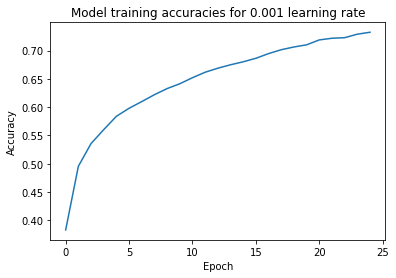

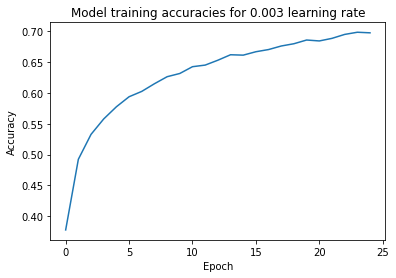

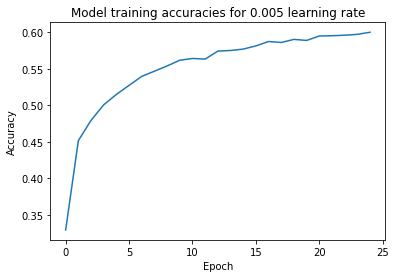

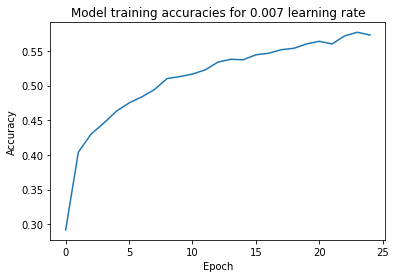

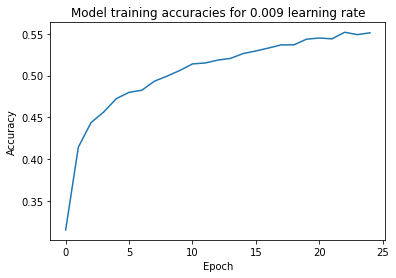

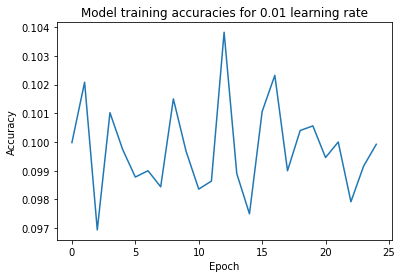

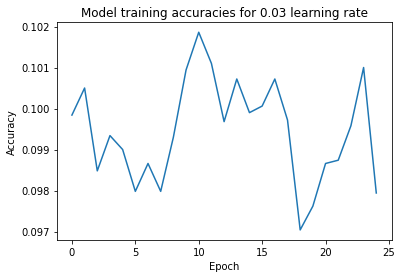

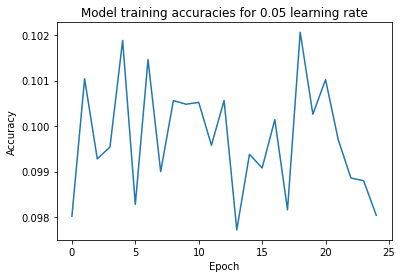

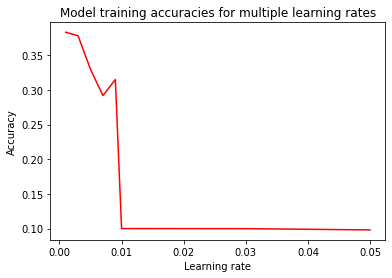


From the plots, we can see that the learning rate of 0.001 gave us the best performance of 38.32 %


In [16]:
plot_for_multi_lr()



---

As can be seen from the above plots, the model's performance on the training data was best with an accuracy of approx. 75%. However, at this same learning rate on the test data, we can see that the accuracy dropped to 38.32% although it still remained the learning rate with the best performance even on the test data. This large difference between the accuracy on the training and test data shows that the model might have gotten overfitted to the training data. Therefore, to optimize the model and find the right balance, more tuning of the hyperparameters needs to be done.



---

**2.2**

---

Training using multiple batch sizes

In [ ]:
def plot_for_multi_batch_size():

  training_accuracy = {}
  batch_sizes = [16, 32, 64, 80, 128]
  for batch_size in batch_sizes:
    lenet = get_lenet()
    lenet.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
    history = lenet.fit(X_train, y_train, batch_size=batch_size, epochs=25, verbose=0)

    training_accuracy[batch_size] = history.history['accuracy'][0]

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title(f'Model training accuracies for {batch_size} batch size')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

  plt.plot(batch_sizes, list(training_accuracy.values()), color ='red')
  plt.xlabel("Batch size")
  plt.ylabel("Accuracy")
  plt.title(f'Model training accuracies for multiple batch sizes')
  plt.show()

  best_acc = max(training_accuracy.values())
  batch_size = 0
  for key, value in training_accuracy.items():
    if value == best_acc:
      batch_size = key
      break

  print(f"\nFrom the plots, we can see that the batch size of {batch_size} gave us the best performance of {(100*best_acc):.2f} %")

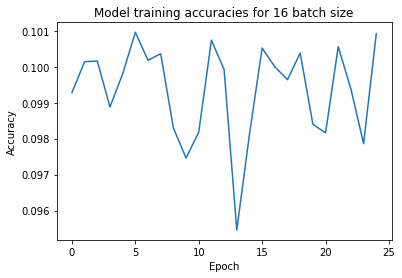

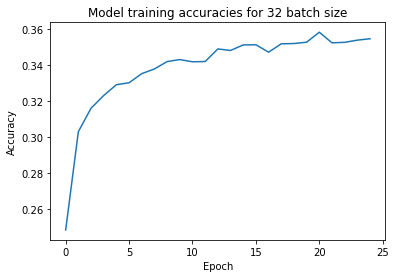

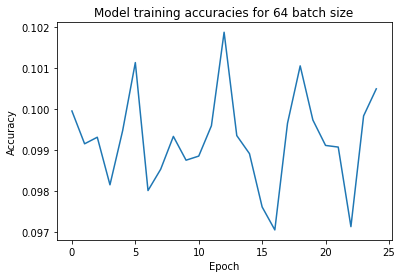

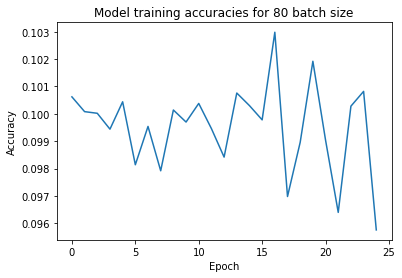

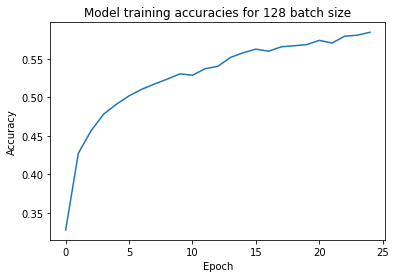

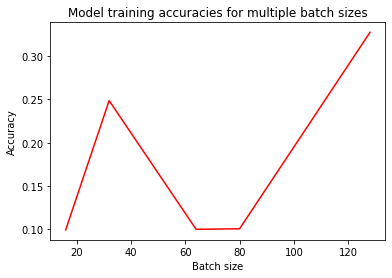


From the plots, we can see that the batch size of 128 gave us the best performance of 32.77 %


In [ ]:
plot_for_multi_batch_size()



---

As can be seen from the results above, the number of batch size is directly proportional to the performance of the model, however it fluctuated at certain batch sizes (64 and 80). The model trained on a batch size of 128 gave the best performance with an accuracy of 32.77%.



---


**2.3**

---



In [13]:
lenet = get_lenet()
eval_with_hyperparams(lenet, network_name="lenet")

Epoch 1/15
391/391 [==============================] - 3s 5ms/step - loss: 1.7390 - accuracy: 0.3609
Epoch 2/15
391/391 [==============================] - 2s 5ms/step - loss: 1.4614 - accuracy: 0.4696
Epoch 3/15
391/391 [==============================] - 2s 5ms/step - loss: 1.3499 - accuracy: 0.5137
Epoch 4/15
391/391 [==============================] - 2s 5ms/step - loss: 1.2683 - accuracy: 0.5450
Epoch 5/15
391/391 [==============================] - 2s 5ms/step - loss: 1.2084 - accuracy: 0.5687
Epoch 6/15
391/391 [==============================] - 2s 5ms/step - loss: 1.1599 - accuracy: 0.5857
Epoch 7/15
391/391 [==============================] - 2s 5ms/step - loss: 1.1156 - accuracy: 0.6039
Epoch 8/15
391/391 [==============================] - 2s 5ms/step - loss: 1.0855 - accuracy: 0.6150
Epoch 9/15
391/391 [==============================] - 2s 5ms/step - loss: 1.0524 - accuracy: 0.6279
Epoch 10/15
391/391 [==============================] - 2s 5ms/step - loss: 1.0261 - accuracy: 0.6378



---


Below are the details of the lenet hyperparameters that gave the best accuracy 
of 63.68% on the test data.

*   Optimizer: SGD
*   Learning rate: 0.001
*   Batch size: 64
*   Epochs: 20

The following is a list of the combinations of hyperparameters with their accuracies on the test data:
1. Adam optimizer, 0.001 learning rate, 128 batch size, and 15 epochs with an accuracy of 62.9%
2. Adam optimizer, 0.005 learning rate, 64 batch size, and 25 epochs with an accuracy of 59.6%
3. Adam optimizer, 0.01 learning rate, 32 batch size, and 30 epochs with an accuracy of 10%



---


**2.4a**

Implementing an equivalent feed forward network

In [ ]:
def get_feedforward_net():
  model = Sequential([
      layers.Input(shape=(32, 32, 3)),
      layers.Flatten(),
      layers.Dense(6, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(120, activation='relu'),

      layers.Dense(84, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  return model

In [ ]:
ff_net = get_feedforward_net()
ff_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 6)                 18438     
                                                                 
 dense_1 (Dense)             (None, 16)                112       
                                                                 
 dense_2 (Dense)             (None, 120)               2040      
                                                                 
 dense_3 (Dense)             (None, 84)                10164     
                                                                 
 dense_4 (Dense)             (None, 10)                850       
                                                                 
Total params: 31,604
Trainable params: 31,604
Non-traina

In [ ]:
ff_net.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
ff_net.fit(X_train, y_train, batch_size=64, epochs=25)

# Evaluate
loss, accuracy = ff_net.evaluate(X_test, y_test)
print('\nFeed Forward Net Test loss:', loss)
print('Feed Forward Net Test accuracy:', accuracy)

Epoch 1/25
782/782 [==============================] - 5s 5ms/step - loss: 2.3149 - accuracy: 0.0987
Epoch 2/25
782/782 [==============================] - 4s 5ms/step - loss: 2.3036 - accuracy: 0.0976
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 2.3035 - accuracy: 0.0992
Epoch 4/25
782/782 [==============================] - 4s 5ms/step - loss: 2.3037 - accuracy: 0.0992
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 2.3037 - accuracy: 0.1011
Epoch 6/25
782/782 [==============================] - 4s 5ms/step - loss: 2.3036 - accuracy: 0.1006
Epoch 7/25
782/782 [==============================] - 4s 6ms/step - loss: 2.3037 - accuracy: 0.0985
Epoch 8/25
782/782 [==============================] - 4s 6ms/step - loss: 2.3036 - accuracy: 0.1012
Epoch 9/25
782/782 [==============================] - 5s 6ms/step - loss: 2.3036 - accuracy: 0.0984
Epoch 10/25
782/782 [==============================] - 5s 6ms/step - loss: 2.3036 - accuracy: 0.0998



---

Now we will compare it with a LeNet model having the same hyperparameters

In [ ]:
lenet = get_lenet()
lenet.summary()

In [ ]:
lenet.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
lenet.fit(X_train, y_train, batch_size=64, epochs=25)

# Evaluate
score = lenet.evaluate(X_test, y_test)
print('LeNet Test loss:', score[0])
print('LeNet Test accuracy:', score[1])

Epoch 1/25
782/782 [==============================] - 56s 71ms/step - loss: 1.9123 - accuracy: 0.2930
Epoch 2/25
782/782 [==============================] - 56s 71ms/step - loss: 1.7316 - accuracy: 0.3681
Epoch 3/25
782/782 [==============================] - 47s 60ms/step - loss: 1.6782 - accuracy: 0.3897
Epoch 4/25
782/782 [==============================] - 51s 66ms/step - loss: 1.6661 - accuracy: 0.3965
Epoch 5/25
782/782 [==============================] - 52s 67ms/step - loss: 1.6300 - accuracy: 0.4121
Epoch 6/25
782/782 [==============================] - 54s 69ms/step - loss: 1.6199 - accuracy: 0.4143
Epoch 7/25
782/782 [==============================] - 49s 63ms/step - loss: 1.6121 - accuracy: 0.4189
Epoch 8/25
782/782 [==============================] - 49s 63ms/step - loss: 1.6022 - accuracy: 0.4227
Epoch 9/25
782/782 [==============================] - 47s 60ms/step - loss: 1.5969 - accuracy: 0.4261
Epoch 10/25
782/782 [==============================] - 48s 61ms/step - loss: 1.587

---

**2.4b**

From the result gotten from the summary functions of the two networks, we can see that the feedforward network has 31,604 params and the LeNet model has 62,006 params which is clearly bigger. However, CNN architectures show way greater performance compared to regular feed forward networks (almost 4 times the performance of the feedforward network) and hence are better for image classification tasks.



---

**2.4a**

---

The feed forward network model produce an accuracy of 0.1 (10%) and a loss of 2.31, while the leNet model produced an accuracy of 0.41 (41%) and a loss of 1.69 which is 4x the performance of for the model for the feed forward network.

# Question 3

---


In [4]:
X = np.array([[7, 5, 0, 0, 3, 2],
             [6, 4, 5, 1, 4, 8],
             [9, 0, 2, 2, 5, 4],
             [6, 3, 4, 7, 9, 8],
             [5, 7, 5, 6, 9, 0],
             [7, 9, 0, 8, 2, 3]])

f = np.array([[1, 0, -1],
             [2, 0, -2],
             [1, 0, -1]])

**3.1**

---



The number of parameters in the filter can be calculated using the formula below:

$Number\ of\ parameters  = F^2CK + K$

In [15]:
print("The dimension of the input, X is =", X.shape)
print("The dimension of the filter, f is =", f.shape)

The dimension of the input, X is = (6, 6)
The dimension of the filter, f is = (3, 3)


In [5]:
F = f.shape[0]
C = 1
K = 1

n_parameters = (F **2) * C * K + K
print(f"The kernel has {n_parameters} parameters")

The kernel has 10 parameters




---
The kernel has 10 parameters




---


**3.2** 

---



The outputted activation map is gotten by element-wise multiplication of the elements in the input matrix and those in the filter

In [6]:
def get_activation_map(X, f):
  activation_map = []

  output_dim = 1 + (X.shape[0] - f.shape[0])

  for i in range(output_dim):

    row = []
    for j in range(output_dim):

      x1 = X[i:3+i, j:3+j]
      a1 = np.sum(np.multiply(x1, f))

      row.append(a1)
  
    activation_map.append(row)
  return np.array(activation_map)


In [7]:
activation_map = get_activation_map(X, f)
print(activation_map)

[[ 16   9  -4 -18]
 [ 17  -5 -10 -12]
 [ 11  -9 -17   2]
 [  9  -1 -15  16]]




---


**3.3**

---



When max pooling of dimension (2, 2) is applied to the activation map, we get the following

In [8]:
def apply_max_pooling(activation_map):
  output = []

  for i in range(0, int(activation_map.shape[0]/2) + 1, 2):
    row = []

    for j in range(0, int(activation_map.shape[1]/2) + 1, 2):
      max_ = max(activation_map[i:2+i, j:2+j].flatten())

      row.append(max_)
  
    output.append(row)
  return np.array(output)

In [9]:
output = apply_max_pooling(activation_map)
print(output)

[[17 -4]
 [11 16]]
